# Assignment 3
### By AnneLouise de Boer

The labelling typology for the dataset identifies for each comment a higher-level classification of whether that comment ‘has a place in
a healthy online conversation’, accompanied for
each comment by binary labels for whether it is:

(1) hostile,

(2) antagonistic, insulting, provocative or trolling (together, ‘antagonistic’),

(3) dismissive

(4) condescending or patronising (together, ‘condescending’)

(5) sarcastic

(6) an unfair generalisation.

For each label there is also an associated confidence score (between 0.5 and 1).

Trusted judgments column shows how many people have judged the comment. 

This is a multi-label classification problem.
Every label corresponds to a binary classification problem and each comment can belong to more than one label simultaneously. 
For example, in our case a comment may be hostile, sarcastic and dismissive at the same time.

We need to make a multi-labeled model capable of detecting different types of unhealthy like hostile, dismissive, antagonistic etc. We need to create a model which predicts a probability of each type of unhealthy for each comment.

https://github.com/kesari007/Toxic-Comment-Classification/blob/master/Minor%202.ipynb

In [405]:
import pandas as pd
train_data_dir = "https://raw.githubusercontent.com/conversationai/unhealthy-conversations/master/corpus/train.csv"
test_data_dir = "https://raw.githubusercontent.com/conversationai/unhealthy-conversations/master/corpus/test.csv"
train = pd.read_csv(train_data_dir, index_col = "_unit_id")
test = pd.read_csv(test_data_dir, index_col = "_unit_id")

In [406]:
print(train.columns)

Index(['_trusted_judgments', 'comment', 'antagonise', 'antagonise:confidence',
       'condescending', 'condescending:confidence', 'dismissive',
       'dismissive:confidence', 'generalisation', 'generalisation:confidence',
       'generalisation_unfair', 'generalisation_unfair:confidence', 'healthy',
       'healthy:confidence', 'hostile', 'hostile:confidence', 'sarcastic',
       'sarcastic:confidence'],
      dtype='object')


In [407]:
print(train.shape)

(35503, 18)


In [408]:
print(train.dtypes)

_trusted_judgments                    int64
comment                              object
antagonise                            int64
antagonise:confidence               float64
condescending                         int64
condescending:confidence            float64
dismissive                            int64
dismissive:confidence               float64
generalisation                        int64
generalisation:confidence           float64
generalisation_unfair               float64
generalisation_unfair:confidence    float64
healthy                               int64
healthy:confidence                  float64
hostile                               int64
hostile:confidence                  float64
sarcastic                             int64
sarcastic:confidence                float64
dtype: object


In [409]:
print(train.isnull().values.any())

True


In [410]:
print(train.isna().any())

_trusted_judgments                  False
comment                              True
antagonise                          False
antagonise:confidence               False
condescending                       False
condescending:confidence            False
dismissive                          False
dismissive:confidence               False
generalisation                      False
generalisation:confidence           False
generalisation_unfair               False
generalisation_unfair:confidence    False
healthy                             False
healthy:confidence                  False
hostile                             False
hostile:confidence                  False
sarcastic                           False
sarcastic:confidence                False
dtype: bool


Colums that I will use do not contain NaN values.

In [411]:
print(train[(train["healthy"] == 1)])

            _trusted_judgments  \
_unit_id                         
2297540155                   5   
1812168131                   5   
1739466190                   3   
1739453667                   3   
1739459056                   3   
...                        ...   
2028122744                   5   
1739457896                   3   
1812167305                   5   
1739471203                   3   
1739460996                   3   

                                                      comment  antagonise  \
_unit_id                                                                    
2297540155  Personally I prefer the Flying Spaghetti Monst...           0   
1812168131  Your comparing a pipeline to a well? One that ...           0   
1739466190  Natives refuse to even consider that their cur...           0   
1739453667  Bush could very well win an election today in ...           0   
1739459056  Is a Trudeau endorsement OK? After all, he sup...           0   
...               

Looking at labels

In [412]:
label = train[["antagonise" , "condescending" , "dismissive" , "generalisation" , "generalisation_unfair" , "healthy" , "hostile" , "sarcastic"]]
labels = label.columns
confidence_labels = ['antagonise:confidence',
                     'condescending:confidence',
                     'dismissive:confidence',
                     'generalisation:confidence',
                     'generalisation_unfair:confidence',
                     'hostile:confidence',
                     'sarcastic:confidence']

# Creating a new dataframes 

In [413]:
newtrain = pd.DataFrame()
for feature in labels:
    for value in train[feature]:
        if value == 1:
            newtrain["P1" + feature] = train[feature+":confidence"]
            newtrain["P0" + feature] = 1 - train[feature+":confidence"]
        else:
            newtrain["P0" + feature] = train[feature+":confidence"]
            newtrain["P1" + feature] = 1 - train[feature+":confidence"]

In [414]:
x_train = newtrain.drop(['P0healthy','P1healthy'], axis = 1)
y_train = newtrain[["P0healthy","P1healthy"]].copy()

In [415]:
newtest = pd.DataFrame()
for feature in labels:
    for value in test[feature]:
        if value == 1:
            newtest["P1" + feature] = test[feature+":confidence"]
            newtest["P0" + feature] = 1 - test[feature+":confidence"]
        else:
            newtest["P0" + feature] = test[feature+":confidence"]
            newtest["P1" + feature] = 1 - test[feature+":confidence"]

In [416]:
x_test = newtest.drop(['P0healthy','P1healthy'], axis = 1)
y_test = newtest[["P0healthy","P1healthy"]].copy()

In [417]:
P1_labels = ["P1antagonise", "P1condescending", 
             "P1dismissive", "P1generalisation",
             "P1generalisation_unfair", "P1hostile",
             "P1sarcastic"]
P1_labels_and_P1healthy = ["P1healthy", "P1antagonise", "P1condescending", 
             "P1dismissive", "P1generalisation",
             "P1generalisation_unfair", "P1hostile",
             "P1sarcastic"]
print(x_train.head())

            P1antagonise  P0antagonise  P1condescending  P0condescending  \
_unit_id                                                                   
1739460326        0.4184        0.5816           0.4184           0.5816   
2297540155        0.0000        1.0000           0.0000           1.0000   
1812168131        0.0000        1.0000           0.1937           0.8063   
1739470334        0.2069        0.7931           0.4041           0.5959   
1739466190        0.0000        1.0000           0.0000           1.0000   

            P1dismissive  P0dismissive  P0generalisation  P1generalisation  \
_unit_id                                                                     
1739460326        0.4184        0.5816               1.0               0.0   
2297540155        0.0000        1.0000               1.0               0.0   
1812168131        0.0000        1.0000               1.0               0.0   
1739470334        0.4041        0.5959               1.0               0.0   

In [418]:
print(y_train)

            P0healthy  P1healthy
_unit_id                        
1739460326     0.4184     0.5816
2297540155     0.2019     0.7981
1812168131     0.3919     0.6081
1739470334     0.2083     0.7917
1739466190     0.0000     1.0000
...               ...        ...
2028122744     0.3875     0.6125
1739457896     0.0000     1.0000
1812167305     0.2022     0.7978
1739471203     0.0000     1.0000
1739460996     0.0000     1.0000

[35503 rows x 2 columns]


# Looking at labels

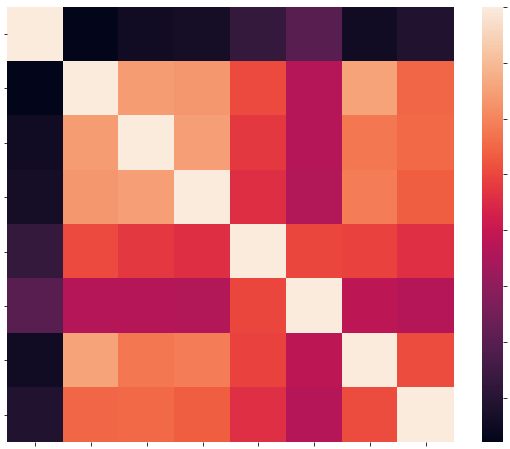

In [419]:
import matplotlib.pyplot as plt
import seaborn as sns

corrtrain = newtrain[P1_labels_and_P1healthy]
corr= corrtrain.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

There is a negative correlation with healthy..


Reading:
https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

p0: probability that the label is 0.

p1: probability that the label is 1.

cross entropy loss compares the prediction from the classifier to the distribution
label is 0, confidence is 0.8. Then (0.8, 0.2)
compute the cross-entropy of the classifiers prediction with respect to the distribution (0.2, 0.8).
The sum over all the instances of the training set will be the adjusted loss function.

Log loss:
y is the label (1 for healthy and 0 for unhealthy) and p(y) is the predicted probability
of the comment being healthy for all N comments.

Reading:
https://datascience.stackexchange.com/questions/19186/can-training-label-confidence-be-used-to-improve-prediction-accuracy

## Cross entropy as loss function

cross entropy between two probability distributions H(P,Q) = - sum x in XP(x)*log(Q(x))
P(x) is the probability of the event x in P.
Q(x) is the probability of the event x in Q.
log is the base-2 logarithm

Reading:
https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/

Log loss, or cross entropy:
Every predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value.
The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score
for a large difference (0.9 or 1.0).
Thus, a perfect model has a log loss score of nearly 0.00. (due to the log)




https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
"The Python function below provides a pseudocode-like working implementation of a function for calculating the cross-entropy for a list of actual 0 and 1 values compared to predicted probabilities for the class 1."

"Cross-entropy can be calculated for multiple-class classification. The classes have been one hot encoded, meaning that there is a binary feature for each class value and the predictions must have predicted probabilities for each of the classes. The cross-entropy is then summed across each binary feature and averaged across all examples in the dataset."



https://en.wikipedia.org/wiki/Multi-label_classification

Wikipedia provides a clear explaination of the multi-label classification. The 3 transformations are the following:
1. Transform to Binary classification

Training one binary classifier for each label. We are dividing the task into multiple binary tasks, the single classifiers deal with a single label, labels are predicted sequentially and the outputs of previous classifiers are input as features to subsequent classifiers.
2. Transform to multi-class classification problem

The label powerset (LP) transformation creates one binary classifier for every label combination present in the training set. 
3. Ensemble methods

A set of multi-class classifiers can be used to create a multi-label ensemble classifier. Each classifier outputs a single class (one label in the multi-label problem) These predictions are then combined by an ensemble method. 

# 1. Transform to Binary Classification

The data set is unbalanced because the number of healthy and unhealthy comments are unbalanced. In this case binary_crossentropy is the loss function because it independently optimises each class.

In [449]:
x_train = x_train[P1_labels]  #confidence values of the P1 labels
x_test = x_test[P1_labels]   #confidence values of the P1 labels
ytrain_sampleweight = train["healthy:confidence"].values #confidence label
ytest_sampleweight = test["healthy:confidence"].values #confidence label

In [421]:
#importing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [422]:
#x_train and y_train for the classifiers
y_train = train["healthy"].values #class values 0 and 1
x_test = x_test
y_test = test["healthy"].values   #class values 0 and 1

In [423]:
print(y_train)
print(y_test)

[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [424]:
len(y_train)

35503

In [425]:
len(y_train[y_train == 1])

32848

In [426]:
len(y_train[y_train ==0])

2655

In [427]:
len(y_test)

4425

In [428]:
len(y_test[y_test ==1])

4105

In [429]:
len(y_test[y_test ==0])

320

We can see that this is a highly inbalanced dataset, where in most cases the comment is healthy. We are tyring to detect unhealthy comments, so we could end up with a bad model with high accuracy. I will therefore use the F1 score instead of accuracy to measure the performance of my model. For imbalanced classification there are two main approaches to random resampling; they are oversampling and undersampling.


https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

'Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).

Precision: A measure of a classifiers exactness.

Recall: A measure of a classifiers completeness

F1 Score (or F-score): A weighted average of precision and recall.

ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values."

## Random Oversampling Imbalanced dataset
Random Oversampling: Randomly duplicate examples in the minority class.

In [430]:
import imblearn as imb
from imblearn.over_sampling import RandomOverSampler


# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x_train, y_train)

In [431]:
from collections import Counter

# summarize class distribution
print(Counter(y_train))
print(Counter(y_over))

Counter({1: 32848, 0: 2655})
Counter({1: 32848, 0: 16424})


This added the amount of 50% of the majority class (of random duplicated of the minority class) to the minority class. 

## Random undersampling for Imbalanced Dataset
Random Undersampling: Randomly delete examples in the majority class

In [432]:
from imblearn.under_sampling import NearMiss

#implementing undersampling for handeling imbalanced data
nm = NearMiss()
x_under, y_under = nm.fit_sample(x_train, y_train)

In [433]:
x_under.shape

(5310, 7)

In [434]:
print(y_under.shape)
print(Counter(y_train))
print(Counter(y_under))

(5310,)
Counter({1: 32848, 0: 2655})
Counter({0: 2655, 1: 2655})


## Combining Oversampling and Undersampling

In [435]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
x, y = over.fit_resample(x_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
x_cb, y_cb = under.fit_resample(x, y)


https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

# Decision Tree classifier
Using a decision tree classifier, I will show the different results using undersampling, oversampling and a combination of the two.

In [436]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
print(f"f1 score decision tree training data): {f1_score(y_test, y_pred)}")
#making a confusion matrix
confusion_matrix(y_test, y_pred)

f1 score decision tree training data): 0.95409278600923


array([[ 119,  201],
       [ 177, 3928]])

## Undersampling, Decision Tree

In undersampling we are losing data, so i predcit that the model will work better using oversampling. 

In [437]:
from sklearn.metrics import accuracy_score, mean_squared_error 
dt.fit(x_under,y_under)
y_pred = dt.predict(x_test)

print(f"f1 score decision tree (undersampling): {f1_score(y_test, y_pred)}")
#making a confusion matrix
confusion_matrix(y_test, y_pred)

f1 score decision tree (undersampling): 0.7688629911848199


array([[ 305,   15],
       [1532, 2573]])

With undersampling we are still getting a lot of false negatives. As you can see below, oversampling does indeed score better than undersampling. 


## Oversampling, Decision Tree

In [438]:
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score 

dt.fit(x_over,y_over)
y_pred = dt.predict(x_test)

print(f"f1 score decision tree (oversampling)): {f1_score(y_test, y_pred)}")
#making a confusion matrix
confusion_matrix(y_test, y_pred)

f1 score decision tree (oversampling)): 0.949317738791423


array([[ 113,  207],
       [ 209, 3896]])

The confusion matrix of the oversampled data looks better than the undersampled one. 

## Combining Oversampling and Undersampling

In [439]:
print(Counter(y_train))
print(Counter(y_cb))

Counter({1: 32848, 0: 2655})
Counter({1: 32848, 0: 16424})


In [440]:
dt.fit(x_cb,y_cb)
y_pred = dt.predict(x_test)

print(f"f1 score (forest): {f1_score(y_test, y_pred)}")
#making a confusion matrix
confusion_matrix(y_test, y_pred)

f1 score (forest): 0.9530054644808743


array([[ 114,  206],
       [ 181, 3924]])

I tried oversampling and undersampling and a combination of both, but this did not get significantly better results compared just using the training set. 

Boosting and bagging the Decision Tree classifier to reduce the accuracy score. 

### Bagging

In [441]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

#defining bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
f1_score(y_test, y_pred)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [ ]:
confusion_matrix(y_test, y_pred)

### Boosting

In [ ]:
#Boosting - Ada Boost
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier())
adb.fit(x_train,y_train)


print(adb.score(x_test,y_test))

print(adb.score(x_train,y_train))

## Random Forest Classifier
fit(X, y[, sample_weight])
I want use the confidence score as a sample_weight for each binary value in the y_train. If people give a 0.51 score for healthy, that means something differnt than a 0.9 score for example. So output with higher confidence scores weigh more. 

In [456]:
#Random Forest - Ensemble of Descision Trees
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score 

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train,sample_weight= ytrain_sampleweight)

y_pred = rf.predict(x_test)
print(f"f1 score (forest): {f1_score(y_test, y_pred,sample_weight= ytest_sampleweight)}")
confusion_matrix(y_test, y_pred)

f1 score (forest): 0.973328046073677


array([[  97,  223],
       [  76, 4029]])

As you can see I used sample weights for fitting and scoring. The f1 score improved from 0.963 to 0.97. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, verbose = 1, scoring='f1_micro')
CV_rfc.fit(x_train, y_train,sample_weight= ytrain_sampleweight)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
CV_rfc.best_params_

The confusion matrix shows that there are: 


I want to find the difference between predicted values and true confidence score.

It has one column per class (in this case two, healhty and not healthy), and one row per instance. For each instance it gives the probability that it is in each class. 

## SGD Classifier

In [458]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, loss = 'log', random_state=42)
sgd_clf.fit(x_train, y_train,sample_weight= ytrain_sampleweight)

cross_val_score(sgd_clf, x_test, y_test, cv=3, scoring='f1_micro')

array([0.9220339 , 0.93084746, 0.92542373])

In [ ]:
y_pred = sgd_clf.predict(x_test)
print(f"f1 score (forest): {f1_score(y_test, y_pred, sample_weight= ytest_sampleweight)}")
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.2, 0.5,  0.9, 1],
}
clf = SGDClassifier(random_state=0, class_weight='balanced')

clf_grid = GridSearchCV(estimator=clf, param_grid=param_grid,
                                    n_jobs=-1, scoring='f1_micro')
clf_grid.fit(x_train,y_train,sample_weight= ytrain_sampleweight)

The confusion matrix shows that there are: 
Its very biased towards the positive values. 

## Logistic Regression

The loss function for logistic regression is the log loss. Therefore I predict the logistic regression to give the best prediction as it gives a higher penalty when the probability is off. 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(x_train, y_train,sample_weight= ytrain_sampleweight)
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='f1_score')

In [ ]:
y_pred = log_clf.predict(x_test)
print(f"f1 score (forest): {f1_score(y_test, y_pred, sample_weight= ytest_sampleweight)}")
confusion_matrix(y_test, y_pred)

## Ensemble Methods
https://scikit-learn.org/stable/modules/ensemble.html

- Group of decision trees on different random subsets of the data
- Combine by voting
- Random Forest
- Hard voting classifier can be better than the strongest individual classifier
- Combining weak learners can lead to a strong learner

## Hard Voting
I first tried hard voting, then I will see how it compares to soft voting. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

dt = DecisionTreeClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[("dt", dt),("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard",
)
voting_clf.fit(x_train, y_train, sample_weight= ytrain_sampleweight)




### Fit on training data

In [ ]:
for clf in (dt, log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train,sample_weight= ytrain_sampleweight)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, {f1_score(y_test, y_pred,sample_weight= ytest_sampleweight)})
    print(clf.__class__.__name__, {accuracy_score(y_test, y_pred, sample_weight= ytest_sampleweight)})

In [ ]:
confusion_matrix(y_test, y_pred)

## Soft Voting

In [ ]:
soft_svm_clf = SVC(probability=True)

soft_voting_clf = VotingClassifier(
    estimators=[("dt", dt),("lr", log_clf), ("rf", rnd_clf), ("svc", soft_svm_clf)],
    voting="soft",
)
soft_voting_clf.fit(x_train, y_train, sample_weight= ytrain_sampleweight)

for clf in (dt, log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(x_train, y_train,sample_weight= ytrain_sampleweight)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, {f1_score(y_test, y_pred,sample_weight= ytest_sampleweight)})
    print(clf.__class__.__name__, {accuracy_score(y_test, y_pred, sample_weight= ytest_sampleweight)})

In [ ]:
confusion_matrix(y_test, y_pred)

# Bagging and Pasting

- Bagging
bootstrap aggregating, sampling with replacement. Creating different bags.
- Pasting
sampling without replacement

- stability


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    RandomForestClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test.round(), y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

still very biased towards the negative

# Boosting
- Adaboost
- Gradient Boosting

For boosting, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. This is combining several weak models to produce a powerful ensemble.

- decrease the bias
reduce variance in the supervised learning algorithm

- Boosting you create a bag and compare the training predicted score with training actual score. You will get some false positive and some false negative, these are saved and added to another bag picked randomly. You train with the ones that you predicted wrong. Pass the false negatives and false positives to the next bag and train again. In this way you are reducing your error. 

- bar graphs, data analysis, drop some values make data 50 50 so its not biased to one of them.
- compare random forest without bagging and without boosting, one should be the best one, boosting probabily. Do bagging with each model individually. AUC / ROC will do this automatically using a threshold. Whichever has most points closer to 1 is the best one. 

In [ ]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(RandomForestClassifier())
adb.fit(x_train,y_train)


adb.score(x_test,y_test)

adb.score(x_train,y_train)

In [ ]:
y_pred = adb.predict(x_test)
accuracy_score(y_test.round(), y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

# Learning rate and early stopping

# Stacking

## AUC and ROC
I want to compare my models AUC to the human scores
https://github.com/conversationai/unhealthy-conversations/blob/master/notebooks/AUC_analysis.ipynb

Sometimes accuracy is not a good way to evaluate your model. To reduce accuracy we can use bagging. The confusion matrix will show. 

Plot the ROC of every model and check which one has the highest AUC.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:   
    preds = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)
    auc = roc_auc_score(y_test, preds)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
    plt.title(f'AUC: {auc}')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')

## Precision-Recall curve
"The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate."
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

good_probs = grid_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, good_probs)
auc_score = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, marker=".", label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall for 'Good' wine class; AUC: {auc_score}")
plt.show()
plt.close("all")